In [ ]:
#grant sanderson of 3blue1brown called the mnist dataset the hello world of deep learning, this is my go at it

In [18]:
import torch
import torch.nn as nn
from sklearn.preprocessing import LabelEncoder,StandardScaler
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
#importing the mnist dataset and normalizing it
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

training_set = datasets.MNIST('/',train=True,transform=transform,download=True)
test_set = datasets.MNIST('/',train=False,transform=transform,download=True)

training_loader = DataLoader(training_set,batch_size=32,shuffle=True)
test_loader = DataLoader(test_set,batch_size=32,shuffle=True)

100%|██████████| 9.91M/9.91M [00:11<00:00, 900kB/s] 
100%|██████████| 28.9k/28.9k [00:00<00:00, 132kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.07MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.26MB/s]


In [26]:
#defining the neural network
class network(nn.Module):

    def __init__(self,input,output):
        super().__init__()
        self.layer1=nn.Linear(input,256)
        self.layer2=nn.Linear(256,128)
        self.layer3=nn.Linear(128,64)
        self.layer4=nn.Linear(64,32)
        self.layer5=nn.Linear(32,output)

    def forward(self,X):
        X = X.view(-1,784)
        out=F.relu(self.layer1(X))
        out=F.relu(self.layer2(out))
        out=F.relu(self.layer3(out))
        out=F.relu(self.layer4(out))
        return self.layer5(out)

#optimizing calculations with a gpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = network(784,10)
model = model.to(device)

#hyperparameters
n_epochs = 30
learning_rate = 0.001
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=learning_rate,weight_decay=0.01)

Epoch 1: Loss is 0.3634799074232578
Epoch 2: Loss is 0.2157337566604217
Epoch 3: Loss is 0.1945675227314234
Epoch 4: Loss is 0.18609707370698453
Epoch 5: Loss is 0.1823566394855579
Epoch 6: Loss is 0.17690653553704422
Epoch 7: Loss is 0.17655653151820103
Epoch 8: Loss is 0.1724562523682912
Epoch 9: Loss is 0.17243408405731123
Epoch 10: Loss is 0.1718261552636822
Epoch 11: Loss is 0.1712023218219479
Epoch 12: Loss is 0.17052473013401032
Epoch 13: Loss is 0.16889739810129006
Epoch 14: Loss is 0.17166756170193354
Epoch 15: Loss is 0.16834648748437564
Epoch 16: Loss is 0.16879343919356665
Epoch 17: Loss is 0.16641522501607736
Epoch 18: Loss is 0.16867846751113733
Epoch 19: Loss is 0.1687583843032519
Epoch 20: Loss is 0.16709589839677016
Epoch 21: Loss is 0.16887402141590913
Epoch 22: Loss is 0.16779547597765923
Epoch 23: Loss is 0.16667723245720067
Epoch 24: Loss is 0.16663627190639577
Epoch 25: Loss is 0.16885310632586478
Epoch 26: Loss is 0.16778381316860516
Epoch 27: Loss is 0.165643453

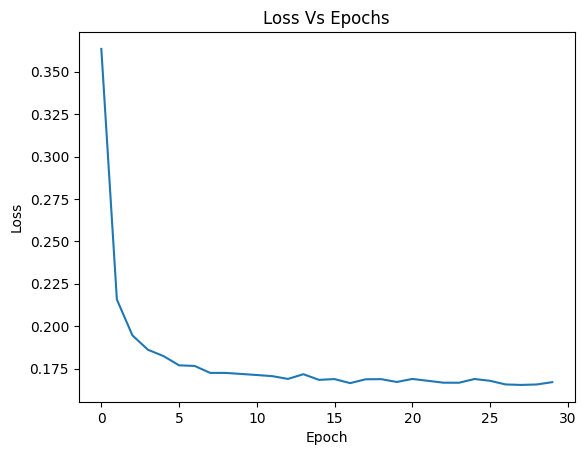

In [27]:
#training loop
graph = {}

for epoch in range(n_epochs):

    total_loss = 0

    for batch_x,batch_y in training_loader:

        batch_x = batch_x.to(device)
        batch_y = batch_y.to(device)

        y_hat = model(batch_x)

        l = loss(y_hat,batch_y)

        l.backward()

        optimizer.step()

        optimizer.zero_grad()

        total_loss += l.item() * batch_x.size(0)

    avg_loss = total_loss/len(training_loader.dataset)

    graph[epoch]=avg_loss

    print(f'Epoch {epoch+1}: Loss is {avg_loss}')

plt.title('Loss Vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(graph.keys(),graph.values())

In [28]:
#model evaluation
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs=inputs.to(device)
        labels=labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 95.38%
